lec 4 Use SQL 

Review Python


In [9]:
demo_str = ' this is my string'

for word_item in demo_str.split():
    print(word_item)

this
is
my
string


In [10]:
print('{} + {} is {}'.format(1,2,1+2))

1 + 2 is 3


# install or import libs

In [17]:
!pip install psycopg2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [96]:
import pandas
import configparser
import psycopg2

# establish connection

In [97]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [98]:
conn = psycopg2.connect(
                    host = host,
                    user = user,
                    password = pwd,
                    dbname=db
                    )

In [99]:
cur=conn.cursor()

## query the data

In [100]:
sql_statement = """
                select bathroom,bedroom 
                from public.house_price
                where bathroom >2
                """

In [101]:
cur.execute(sql_statement) 

In [102]:
cur.fetchone()

(4, 5)

In [103]:
for record in cur.fetchall():
    print(record)

(3, 3)
(3, 4)
(5, 4)
(3, 3)
(6, 5)
(6, 5)
(3, 3)
(3, 3)
(4, 5)
(4, 5)
(3, 2)
(4, 5)
(4, 6)
(3, 3)
(6, 4)
(4, 3)
(3, 2)
(4, 3)
(4, 3)
(4, 5)
(5, 5)


## pandas 

In [104]:
import pandas

In [107]:
df = pandas.read_sql_query(sql_statement,conn)

df['bedroom']

0     5
1     3
2     4
3     4
4     3
5     5
6     5
7     3
8     3
9     5
10    5
11    2
12    5
13    6
14    3
15    4
16    3
17    2
18    3
19    3
20    5
21    5
Name: bedroom, dtype: int64

In [108]:
sql_avg_price_year = """
                    select built_in,
                    avg(price) as avg_price
                    from public.house_price
                    group by built_in
                    order by built_in
                     """
                    

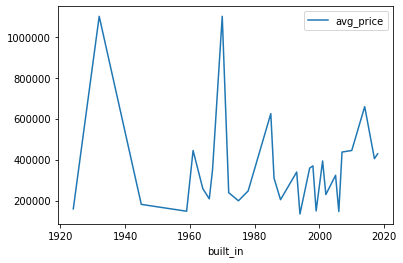

In [111]:
df = pandas.read_sql_query(sql_avg_price_year,conn)

df.plot(x='built_in', y = 'avg_price') 

In [181]:
sql_price_area = """
                select price,area
                from public.house_price
                """

In [182]:
df = pandas.read_sql_query(sql_price_area,conn)

df['price'].hist()


InterfaceError: connection already closed

KeyError: 'area'

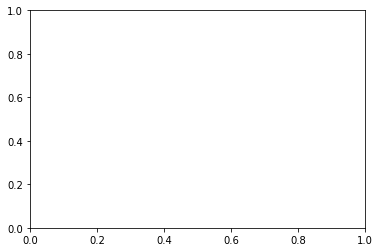

In [183]:

df.plot.scatter(x='area',y='price')

In [184]:
sql_avg_price_house_type = """
                            select house_type,
                            avg(price) as avg_price
                            from public.house_price
                            group by house_type
                            order by avg_price desc
                            """


In [185]:

df = pandas.read_sql_query(sql_avg_price_house_type,conn)

df.plot.bar(y='avg_price',x='house_type')

InterfaceError: connection already closed

In [186]:
sql_insert = """
            insert into demo.student(s_email,s_name,major)
            values('{}','{}','{}')
            """.format('s5@jmu.edu','s','GS')

print(sql_insert)


            insert into demo.student(s_email,s_name,major)
            values('s6@jmu.edu','s6','GS')
            


In [174]:
cur.execute(sql_insert)

InterfaceError: cursor already closed

In [175]:
conn.commit()

InterfaceError: connection already closed

In [176]:
df=pandas.read_sql_query('select * from demo.student',conn)

df[-1:]

InterfaceError: connection already closed

In [177]:
cur.execute("ROLLBACK")

InterfaceError: cursor already closed

In [178]:

conn.commit()

InterfaceError: connection already closed

close connections

In [179]:
cur.close()
conn.close()

In [180]:
df= pandas.read_sql_query('selct * from demo.student',conn)

InterfaceError: connection already closed